**Importing Necessary libraries**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

**Loading and Reading the dataset**

In [2]:
data = pd.read_csv('/content/heart_disease_uci.csv')

#### checking the top 5 rows of dataset

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### checking the columns of dataset

In [4]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

#### checking dtypes of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### checking for the null values

In [5]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


#### handling missing values with simple imputer

In [15]:
numerical_col = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

#### imputing missing values

In [16]:
imputer_num = SimpleImputer(strategy='mean')
data[numerical_col] = imputer_num.fit_transform(data[numerical_col])

In [17]:
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_col] = imputer_cat.fit_transform(data[categorical_col])

#### encoding categorical variables

In [20]:
label_encoder = LabelEncoder()

#### encoding binary columns

In [21]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['fbs'] = label_encoder.fit_transform(data['fbs'])
data['exang'] = label_encoder.fit_transform(data['exang'])

#### one hot encoding for remaining columns

In [23]:
data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

#### seperating feature and target variables

In [24]:
x = data.drop(['id', 'num', 'dataset'], axis = 1)
y = data['num']

#### spliting the data into train, test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### feature scaling

In [26]:
scaler = StandardScaler()

In [29]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Training a model

In [31]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#### evaluate the model

In [32]:
y_pred = model.predict(x_test)

In [33]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 57.07%


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79        75
           1       0.53      0.52      0.52        54
           2       0.23      0.12      0.16        25
           3       0.28      0.19      0.23        26
           4       0.00      0.00      0.00         4

    accuracy                           0.57       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.51      0.57      0.53       184



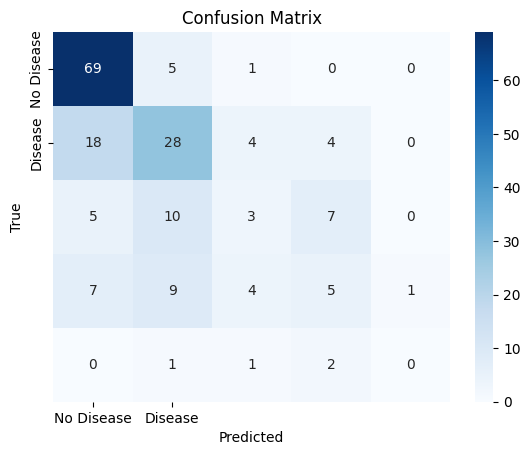

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()